# MODS202
# Econometrics

# project 

## Manel Amilo et El arji Hamza

## Imports

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import t
from scipy import stats
from scipy.stats import f
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import grangercausalitytests

## Données

We are going to use the datasets HPRICE2.RAW described in HPRICE2.DES, and the threecenturies_v2.3 datasets.
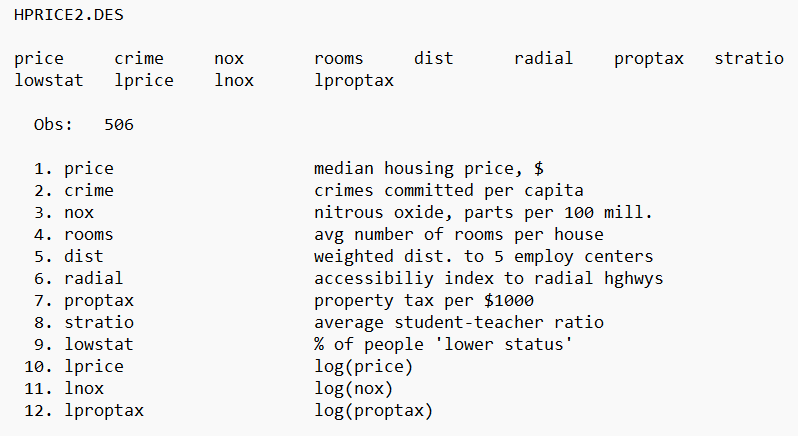

In [2]:
# Import the data
df=pd.read_csv("C:\\Users\\hamza\\OneDrive\\Bureau\\2A\\2p2\\économétrie\\HPRICE2.RAW",delim_whitespace=True, header=None)

# Display the DataFrame
print(df)

        0      1     2     3     4   5     6     7     8          9   \
0    24000  0.006  5.38  6.57  4.09   1  29.6  15.3  4.98  10.085810   
1    21599  0.027  4.69  6.42  4.97   2  24.2  17.8  9.14   9.980402   
2    34700  0.027  4.69  7.18  4.97   2  24.2  17.8  4.03  10.454500   
3    33400  0.032  4.58  7.00  6.06   3  22.2  18.7  2.94  10.416310   
4    36199  0.069  4.58  7.15  6.06   3  22.2  18.7  5.33  10.496790   
..     ...    ...   ...   ...   ...  ..   ...   ...   ...        ...   
501  22400  0.063  5.73  6.59  2.48   1  27.3  21.0  9.67  10.016820   
502  20600  0.045  5.73  6.12  2.29   1  27.3  21.0  9.08   9.933046   
503  23899  0.061  5.73  6.98  2.17   1  27.3  21.0  5.64  10.081590   
504  22000  0.110  5.73  6.79  2.39   1  27.3  21.0  6.48   9.998797   
505  11900  0.047  5.73  6.03  2.51   1  27.3  21.0  7.88   9.384294   

           10        11  
0    1.682688  5.690360  
1    1.545433  5.488938  
2    1.545433  5.488938  
3    1.521699  5.402678  
4    

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    int64  
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    int64  
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 47.6 KB


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678


## PART 1 - CROSS-SECTION DATA 


## 1.State the fundamental hypothesis under which the Ordinary Least Squares (OLS) estimators are unbiased. 

The fundamental assumption under which Ordinary Least Squares (OLS) estimators are unbiased is the absence of correlation between the explanatory (independent) variables and the errors of the model.

In other words, for OLS estimators to be unbiased, the key assumption is that the conditional expectation of the errors is zero for all values of the explanatory variables. Mathematically, this can be expressed as:


$\mathbb{E}(u_i | X_i) = 0$

Where:
- $u_i$ $\text{ represents the error associated with each observation i in the model.}$
- $X_i$ $\text{ represents the corresponding explanatory variables for observation i.}$


## 2. Show that under this assumption the OLS estimators are indeed unbiased. 


\begin{align*}
&y_i = \beta_0 + x_{i1}\beta_1 + x_{i2}\beta_2 + \ldots + x_{iK}\beta_K + u_i \\
&\text{with    } y = (y_1, \ldots, y_n)^T, \quad x_k = (x_{1k}, \ldots, x_{nk})^T, \quad u = (u_1, \ldots, u_n)^T, \\
\\
&\text{we can write the model in matrix notation:} \\
&y = X\beta + u \\
&\text{with } \beta = (\beta_1, \ldots, \beta_K)^T \text{ and } X = [x_1, x_2, \ldots, x_K]. \\
&\text{OLS estimates are obtained by solving the following minimization problem:} \\
&\min_{\beta} \sum_{i=1}^{n} u_i^Tu_i = u^Tu = (y - X\beta)^T(y - X\beta) \quad  \\
&\text{The first-order condition is:} \\
&-2X^T(y - X\beta) = 0 \quad  \\
&\text{This is known as an orthogonality condition between } X \text{ and } u = (y - X\beta) \text{ by taking expectations. Re-arranging terms yields:} \\
&(X^TX)\beta = X^Ty \\
&\text{If there is no multicollinearity, then matrix } (X^TX) \text{ can be inverted and:} \\
&\hat{\beta} = (X^TX)^{-1}X^Ty \quad  \\
&\text{This estimator is unbiased if the fundamental assumption } E(X^Tu) = 0 \text{ is satisfied:} \\
&E(\hat{\beta}) = E((X^TX)^{-1}X^T(X\beta + u)) =E((X^TX)^{-1}X^TX\beta + X^Tu)    =\beta + E(X^Tu) = \beta
\end{align*}



## 3. Explain the sample selection bias with an example from the course. 


Sample selection bias occurs when the process of selecting data for analysis introduces a bias  because the selection process is not random or representative of the entire population. An example from the course context could be in the repair process of RAF planes returning from war zones.

Imagine you're analyzing the effectiveness of repairs on RAF planes that return from war zones. However, the sample you're analyzing might not be representative of the entire population of planes that fly to war zones due to selective sampling.

For instance, planes that return for repairs may not be a random subset of all planes that flew to war zones. Instead, they might represent a biased subset—perhaps they are the ones that sustained minor damages or issues that allowed them to return for repair. The planes that are severely damaged and couldn't return might not be included in your analysis.

This bias can affect your conclusions. If you only analyze the repair effectiveness based on the planes that returned, you might incorrectly assess the overall effectiveness of repairs because you're missing information about the planes that didn't return.


## 4. Explain the omitted variable bias with an example from the course

Omitted variable bias arises when a relevant variable that should be included in a statistical model is left out. In the context of analyzing the relationship between salary and education, imagine constructing a model solely based on education level without considering another crucial factor, like professional experience.

For instance, suppose we aim to understand how education influences salary without accounting for professional experience. In this scenario, omitting the variable of professional experience can lead to biased results. Professional experience often significantly impacts salary; individuals with the same level of education but different levels of experience might have substantially different salaries.

By excluding professional experience from the model, we overlook an essential determinant of salary. Consequently, the estimated effect of education on salary might be inflated or underestimated due to the unaccounted influence of professional experience. 

## 5. Explain the problem of multicollinearity. Is it a problem in this dataset? 


Multicollinearity occurs when two or more columns in the matrix X are (nearly) linearly dependent. This situation leads to a determinant of X^T.X being close to zero, making it challenging to compute the inverse of X^T.X , which is required for calculating standard errors.

One potential solution to address multicollinearity involves either adding more observations to the dataset or removing some variables to mitigate the collinearity issue between the predictors.

Let's see if it is a problem in our data set :

Since we were able to compute  (𝑋𝑇𝑋), multicollinearity doesn't seem to be a problem with this dataset.

In [9]:
# Assigning variables from the DataFrame
price = df[0]
crime = df[1]
nox = df[2]
rooms = df[3]
dist = df[4]
radial = df[5]
proptax = df[6]
stratio = df[7]
lowstat = df[8]
lprice = df[9]
lnox = df[10]
lproptax = df[11]

# Creating the design matrix X
y = price
z=lprice
s = np.shape(price)
const = np.ones(s)
X = np.column_stack((const, crime, nox, rooms, dist, radial, proptax, stratio, lowstat ))

# Computing X^T.X
print("X^T.X:", X.T @ X)

if np.linalg.det(X.T @ X) == 0:
    print("We have a problem of multicollinearity because X^T.X is not invertible")
else:
    print("X^T.X is invertible, we don't have a problem of multicollinearity")
    



X^T.X: [[5.06000000e+02 1.82743700e+03 2.80819000e+03 3.17973000e+03
  1.92065000e+03 4.83200000e+03 2.06568000e+04 9.34040000e+03
  6.42695000e+03]
 [1.82743700e+03 4.38649890e+04 1.22582549e+04 1.08167787e+04
  3.46542531e+03 4.10756090e+04 1.17214233e+05 3.64455779e+04
  3.72476673e+04]
 [2.80819000e+03 1.22582549e+04 1.62624931e+04 1.75223449e+04
  9.71022360e+03 2.99253500e+04 1.21216675e+05 5.20739420e+04
  3.81477743e+04]
 [3.17973000e+03 1.08167787e+04 1.75223449e+04 2.02308739e+04
  1.22229613e+04 2.97164600e+04 1.28061554e+05 5.84235150e+04
  3.88217353e+04]
 [1.92065000e+03 3.46542531e+03 9.71022360e+03 1.22229613e+04
  9.53039370e+03 1.37562600e+04 6.88290140e+04 3.49256960e+04
  2.05797563e+04]
 [4.83200000e+03 4.10756090e+04 2.99253500e+04 2.97164600e+04
  1.37562600e+04 8.44300000e+04 2.64715900e+05 9.36165000e+04
  7.65244000e+04]
 [2.06568000e+04 1.17214233e+05 1.21216675e+05 1.28061554e+05
  6.88290140e+04 2.64715900e+05 9.86731360e+05 3.89683050e+05
  2.94875772e+05]

Since we were able to compute  (𝑋𝑇𝑋), multicollinearity doesn't seem to be a problem with this dataset.

## 6. Create three categories of nox levels (low, medium, high), corresponding to the following percentiles: 0-39%, 40%-60%, 61%-100% 


In [10]:
# Calculate the percentiles
percentiles = [0, 0.4, 0.6, 1]

# Create the categories
categories = pd.qcut(df[2], q=percentiles, labels=['low', 'medium', 'high'])

# Add the categories to the dataframe
df['nox_category'] = categories

## 7. Compute for each category of nox level the average median price and comment on your results


In [11]:
# Calculate the average median price per category
average_median_price = df.groupby('nox_category')[0].median()
print(average_median_price)

nox_category
low       24499.0
medium    20100.0
high      16300.0
Name: 0, dtype: float64


This comparison suggests a potential relationship between nitrous oxide levels and median housing prices: areas with lower emissions tend to have higher housing prices, while areas with higher emissions tend to have lower housing prices. This association might stem from preferences for cleaner environments influencing property values.

Thus, the results indicate a potential correlation between pollution levels ('nox') and housing prices. However, correlation does not imply causation, and other factors might influence housing prices in these areas. It's important to consider additional variables like location, neighborhood amenities, crime rates, or access to public services that could also influence housing prices. The relationship observed here might be influenced by these factors, and further analysis is required to establish a causal relationship.


## 8. Produce a scatter plot with the variable price on the y-axis and the variable nox on the x-axis. Is this a ceteris paribus effect? 




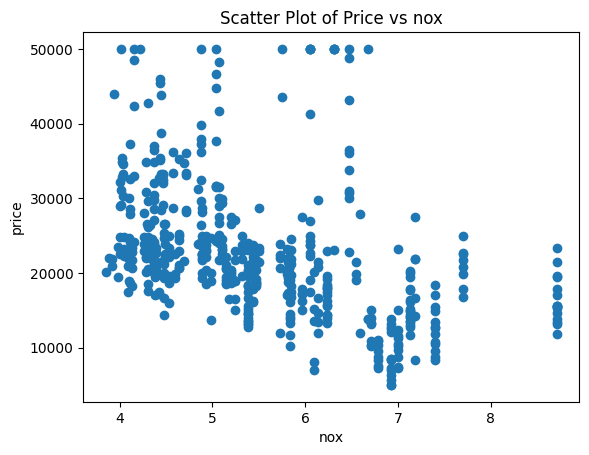

In [12]:
# Assigning variables from the DataFrame
price = df[0]
nox = df[2]
#scatter plot of price vs nox
plt.scatter(df[2], df[0])
plt.xlabel('nox')
plt.ylabel('price')
plt.title('Scatter Plot of Price vs nox')
plt.show()

The scatter plot shows the variation in housing prices concerning the level of nitric oxides. While it examines the relationship between price and nox, it doesn't inherently maintain all other variables constant. In a strict sense, ceteris paribus implies isolating one variable's effect while keeping all others unchanged, which might not be the case here.

Factors like neighborhood quality, proximity to amenities, and other unobserved variables can significantly influence housing prices. Therefore, while the scatter plot visualizes the relationship between price and nox, it doesn't precisely capture a ceteris paribus effect since other unaccounted variables might concurrently impact housing prices.



## 9. Run a regression of price on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients. 



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.06e-91
Time:                        20:33:36   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

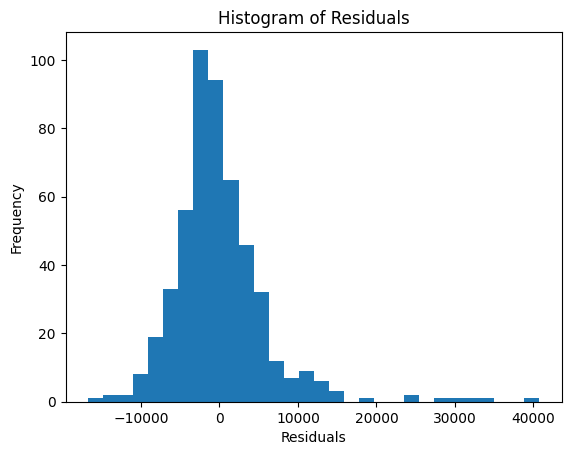

In [13]:
# According to question 5
y = price
s = np.shape(price)
const = np.ones(s)

# Creating the matrix X by stacking the constant, crime, nox, rooms, and proptax columns
X1 = np.column_stack((const, crime, nox, rooms, proptax ))

# Initializing the Ordinary Least Squares (OLS) linear regression model with the dependent variable y and the matrix X1
model = sm.OLS(y, X1)

# Fitting the model to the data
results = model.fit()

# Print the regression summary
print(results.summary())

# Residuals
residuals = results.resid

# Histogram of residuals
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

$\textbf{• const:} $ The intercept of the regression line. It represents the expected value of 'price' when all predictor variables ('crime', 'nox', 'rooms', 'proptax') are zero. Here, it's a negative value (-1.868e+04). However, in the case of predictors like 'rooms', it's illogical or impossible for a house to have zero rooms, which affects the interpretability of the intercept.

$\textbf{• x1 (crime):}$ An increase of one unit in the 'crime' variable is associated with a decrease of approximately 136.54 units in housing prices, all other things being equal. This implies a negative relationship between the crime rate and housing prices: as the crime rate rises, housing prices are likely to decrease.

$\textbf{• x2 (nox):} $ Each unit increase in the level of nitric oxides (nox) is associated with a decrease of approximately 660.47 units in housing prices, all else being equal. This suggests a negative relationship between the level of nitric oxides and housing prices: as the level of nitric oxides increases, housing prices tend to decrease.

$ \textbf{• x3 (rooms):}$ For each additional unit in the number of rooms, there is an expected increase of approximately 7797.93 units in housing prices, all other factors remaining constant. This suggests a strong positive correlation between the number of rooms and housing prices: the higher the number of rooms, the more housing prices tend to increase.

$ \textbf{• x4 (proptax):} $ An increase of one unit in property tax (proptax) is associated with a decrease of about 89.41 units in housing prices, all other things being equal. This implies a negative relationship between property tax and housing prices: higher property taxes are linked to a decrease in housing prices.

$ \textbf{• résiduals:} $ The histogram of residuals provides insight into the spread of errors in a regression model. Ideally, a normal distribution of residuals indicates that these errors are evenly scattered around zero. A bell-shaped curve in the histogram suggests that the model's errors are random, reflecting its suitability for the data. However, in our case, the distribution isn't centered on zero, indicating that the model may have systematic biases. These patterns in residuals hint at the model's inability to capture specific data relationships or features, resulting in biased predictions.





## 10. Run a regression of lprice on a constant, crime, nox, rooms, proptax. Comment on the histogram of the residuals. Interpret all coefficients. 




                            OLS Regression Results                            
Dep. Variable:                      9   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          2.50e-101
Time:                        21:44:08   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137     63.320      0.0

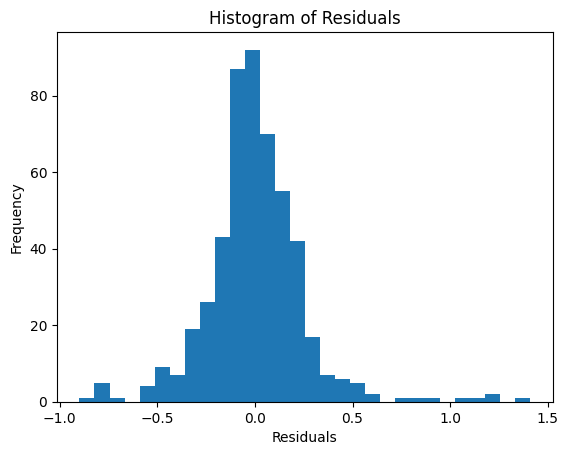

In [150]:
# According to question 5
z = lprice
s = np.shape(price)
const = np.ones(s)

# Creating the matrix X by stacking the constant, crime, nox, rooms, and proptax columns
X1 = np.column_stack((const, crime, nox, rooms, proptax ))

# Initializing the Ordinary Least Squares (OLS) linear regression model with the dependent variable y and the matrix X1
model = sm.OLS(z, X1)

# Fitting the model to the data
results = model.fit()

# Print the regression summary
print(results.summary())

# Residuals
residuals = results.resid

# Histogram of residuals
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

$\textbf{• x1 (crime):}$ An increase of one unit in the 'crime' variable is associated with a (100 * (-0.0125)) ≈ 1.25% decrease in the housing prices (lprice), assuming all other predictors remain constant.

$\textbf{• x2 (nox):} $ Each unit increase in the level of nitric oxides (nox) is associated with a (100 * (-0.0476)) ≈ 4.76% decrease in the housing prices (lprice), holding other predictors constant.

$ \textbf{• x3 (rooms):}$ For each additional unit in the number of rooms, there's an expected increase of about (100 * 0.2816) ≈ 28.16% in the housing prices (lprice), keeping all other factors constant.

$ \textbf{• x4 (proptax):} $ An increase of one unit in property tax (proptax) is linked to a (100 * (-0.0043)) ≈ 0.43% decrease in the housing prices (lprice), assuming all other predictors remain constant.

$ \textbf{• résiduals:} $ The histogram of residuals is centered around zero. That implies that the errors are relatively symmetrically distributed. This scenario aligns with the assumption that the model's errors are unbiased and are generally spread equally above and below the zero line.

$ \textbf{• R²:} $ There is also an increase of R² and it suggests that the model is better at explaining the variation in the target variable using the provided predictors.


## 11. Run a regression of lprice on a constant, crime, lnox, rooms, lproptax. Comment on the histogram of the residuals. Interpret all coefficients. 




                            OLS Regression Results                            
Dep. Variable:                      9   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sun, 10 Dec 2023   Prob (F-statistic):          1.77e-101
Time:                        21:44:08   Log-Likelihood:                -26.021
No. Observations:                 506   AIC:                             62.04
Df Residuals:                     501   BIC:                             83.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7505      0.253     38.476      0.0

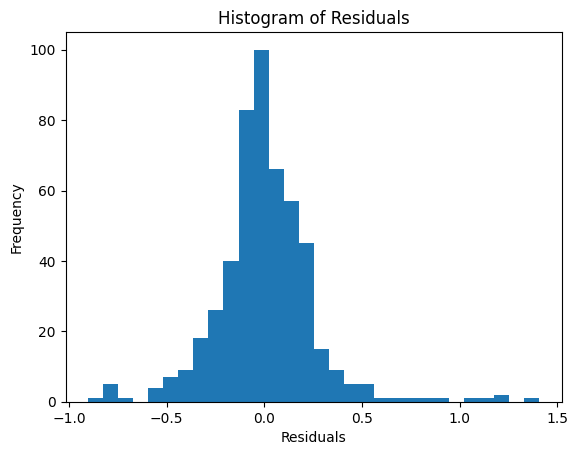

In [151]:
# According to question 5
z = lprice
s = np.shape(price)
const = np.ones(s)

# Creating the matrix X by stacking the constant, crime, nox, rooms, and proptax columns
X2 = np.column_stack((const, crime, lnox, rooms, lproptax ))

# Initializing the Ordinary Least Squares (OLS) linear regression model with the dependent variable y and the matrix X1
model = sm.OLS(z, X2)

# Fitting the model to the data
results = model.fit()

# Print the regression summary
print(results.summary())

# Residuals
residuals = results.resid

# Histogram of residuals
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

$\textbf{• x1 (crime):}$ An increase of one unit in the crime rate is associated with a decrease of approximately 1.28% in the log of housing prices, assuming all other variables remain constant.

$\textbf{• x2 (log of nox):} $ A one-unit increase in the natural logarithm of nitric oxides is linked to a decrease of about 27.69% in the log of housing prices, holding other variables constant.

$ \textbf{• x3 (rooms):}$ For each additional unit in the number of rooms, there is an expected increase of approximately 28.02% in the log of housing prices, assuming all other variables are constant.

$ \textbf{• x4 (log of proptax):} $ An increase of one unit in the natural logarithm of property tax is associated with a decrease of around 17.79% in the log of housing prices, considering other variables remain constant.

$ \textbf{• résiduals:} $ The histogram of residuals is centered around zero with a thinner bell shape in the center implies that more data points have residuals closer to zero. This thinner center in the bell-shaped histogram could indicate a tighter clustering of errors around zero. It might suggest that the model's predictions are closer to the actual observed values for a significant portion of the dataset. 

$ \textbf{• R²:} $ There is also an increase of R² and it suggests that the model is better at explaining the variation in the target variable using the provided predictors.


## 12.In the specification of question 10, test the hypothesis H0: $\beta_{\text{nox}}$ >0 vs H1: $\beta_{\text{nox}}$< 0 at the 10%  level



In [15]:
# According to question 10 z = lprice and X1 = np.column_stack((const, crime, nox, rooms, proptax ))
#We are not hoing to use the p-value of the constant because it is not written in the question

# We can read the values from the table of Q.10
beta_nox = -0.0476
std_error_nox = 0.013 

# Calculate the t-statistic
t_statistic = beta_nox / std_error_nox
print("t-statistic:", t_statistic)

# Degrees of freedom (n - k)
n, k = 506, 5
degrees_of_freedom = n - k

# Critical value from the t-distribution at the 10% significance level
alpha = 0.10
critical_value = stats.t.ppf(alpha, degrees_of_freedom)
print("critical value:", critical_value)


# Test the hypothesis
if t_statistic < -critical_value:
    print("Reject the null hypothesis at the 10% significance level.")
else:
    print("Fail to reject the null hypothesis at the 10% significance level.")

t-statistic: -3.661538461538462
critical value: -1.2832436320111769
Reject the null hypothesis at the 10% significance level.


## 13. In the specification of question 10, test the hypothesis H0: $\beta_{\text{nox}}$=0 vs H1: $\beta_{\text{nox}}$≠0 at the 10%  level using the p-value of the test 


In [16]:
# Compute the p-value, we have to put abs and multiply by 2 because it is a two-tailed test
p_value = 2 * t.sf(abs(t_statistic), degrees_of_freedom) 

# Compare the adjusted p-value with the significance level (0.10 for 10%)
if p_value <= 0.10:
    print("Reject null hypothesis: β_nox ≠0 at the 10% significance level")
else:
    print("Fail to reject null hypothesis: β_nox =0 at the 10% significance level")

Reject null hypothesis: β_nox ≠0 at the 10% significance level


## 14. In the specification of question 10, test the hypothesis H0: $\beta_{\text{crime}}$ = $\beta_{\text{proptax}}$ at the 1% level 


In [17]:
# We can transform our test by putting an equivalent test : H0 : téta = 0 and H1 : téta < 0 with téta = β_crime - β_proptax
# So we have log(price)= const + βcrime*crime + βnox*nox + βrooms*rooms + βproptax*proptax 
#                      = const + téta*crime + βnox*nox + βrooms*rooms + βproptax*(proptax + crime)

# define the new regression 
X4 = np.column_stack((const, crime, nox, rooms, proptax+crime ))

# Réinitialiser le modèle OLS avec la nouvelle matrice de variables explicatives X2
model2 = sm.OLS(z, X4)

# Ajuster le modèle à vos données
results2 = model2.fit()

# Afficher le résumé de la nouvelle régression
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      9   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.9
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          2.50e-101
Time:                        20:35:25   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137     63.320      0.0

In [18]:
# read on the previous table
diff_coef = -0.0083
se_diff = 0.002

# Calculate the t-statistic for the difference in coefficients
t_statistic = diff_coef / se_diff
print("t-statistic:", t_statistic)

# Critical value from the t-distribution at the 10% significance level
alpha = 0.010
critical_value = stats.t.ppf(alpha, degrees_of_freedom)
print("critical value:", critical_value)

# Test the hypothesis
if t_statistic < -critical_value:
    print("Reject the null hypothesis at the 1% significance level.")
else:
    print("Fail to reject the null hypothesis at the 1% significance level.")

t-statistic: -4.15
critical value: -2.333813977264229
Reject the null hypothesis at the 1% significance level.


## 15. In the specification of question 10, test the hypothesis H0: $\beta_{\text{nox}}$ = 0, $\beta_{\text{proptax}}$ = 0 at the 1% level 

In [20]:
# We are going to consider the test :  H0 : β_nox = 0, β_proptax = 0  vs  H1 : H0 is not true

# Unconstrained model (with all variables)
z = lprice
X_nc = np.column_stack((const, crime, nox, rooms, proptax ))
model = sm.OLS(z, X_nc)
results_nc = model.fit()
residuals_nc = results_nc.resid
SSR_nc= np.sum(residuals_nc ** 2)
n,k = X_nc.shape
ddl_nc = n-k 

# Constrained model (without nox and proptax) 
z = lprice
X_c = np.column_stack((const, crime, rooms))
model = sm.OLS(z, X_c)
results_c = model.fit()
residuals_c = results_c.resid
SSR_c= np.sum(residuals_c ** 2)
l,t = X_c.shape
ddl_c = l-t 

# Calculate the F-statistic
q = ddl_c - ddl_nc
F_statistic = ((SSR_c - SSR_nc )/ q ) / (SSR_nc / (n-k-1))

#Set the significance level
alpha = 0.01

# Calculate the critical value from the F-distribution
critical_value = f.ppf(alpha, q, n - k-1)

# Perform the hypothesis test
if F_statistic > critical_value:
    print("Reject the null hypothesis: SSR_c is higher than SSR_nc.")
else:
    print("Fail to reject the null hypothesis: SSR_c is not higher than SSR_nc.")


Reject the null hypothesis: SSR_c is higher than SSR_nc.


## 16. In the specification of question 10, test the hypothesis H0: $\beta_{\text{nox}}$ = -500, $\beta_{\text{proptax}}$  = -100 at the 1% level using the p-value of the test 

In [23]:
# We are going to consider the test :  H0 : β_nox = -500, β_proptax = -100  vs  H1 : H0 is not true

# Unconstrained model (with all variables)
z = lprice
X_nc = np.column_stack((const, crime, nox, rooms, proptax ))
model = sm.OLS(z, X_nc)
results_nc = model.fit()
residuals_nc = results_nc.resid
SSR_nc= np.sum(residuals_nc ** 2)
n,k = X_nc.shape
ddl_nc = n-k 

# Constrained model (without nox and proptax) 
w = lprice + 500*nox + 100*proptax
X_c = np.column_stack((const, crime, rooms))
model = sm.OLS(w, X_c)
results_c = model.fit()
residuals_c = results_c.resid
SSR_c= np.sum(residuals_c ** 2)
l,t = X_c.shape
ddl_c = l-t 

# Calculate the F-statistic
q = ddl_c - ddl_nc
F_statistic = ((SSR_c - SSR_nc )/ q ) / (SSR_nc / (n-k-1))

#Set the significance level
alpha = 0.01

# Calculate the p-value
p_value = f.sf(F_statistic, q, n-k-1)

# Set the significance level
alpha = 0.01

# Perform the hypothesis test using the p-value
if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis (restrictions).")


Reject the null hypothesis.


## 17. In the specification of question 10, test the hypothesis H0: $\beta_{\text{nox}}$ + $\beta_{\text{proptax}}$  = -1000 at the 1% level using the p-value of the test

In [29]:
# We can transform our test by putting an equivalent test : H0 : téta = 0 and H1 : téta < 0 with téta = -1000 - β_nox - β_proptax
# So we have log(price)= const + βcrime*crime + βnox*nox + βrooms*rooms + βproptax*proptax 
#    log(price) + 1000nox =  const + βcrime*crime + βnox*nox + βrooms*rooms + βproptax*proptax +1000*nox
#                         =  const + βcrime*crime + (βnox+1000)*nox + βrooms*rooms + βproptax*proptax 
#                         =  const + βcrime*crime + (-téta -βproptax )*nox + βrooms*rooms + βproptax*proptax 
#                         =  const + βcrime*crime - téta*nox + βrooms*rooms + βproptax*(proptax - nox) 

# define the new regression
g=z+1000*nox 
X5 = np.column_stack((const, crime, nox, rooms, proptax - nox ))

# Réinitialiser le modèle OLS avec la nouvelle matrice de variables explicatives X2
model2 = sm.OLS(g, X5)

# Ajuster le modèle à vos données
results2 = model2.fit()

# Afficher le résumé de la nouvelle régression
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.580e+09
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:36:35   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137     63.320      0.0

In [30]:
# read on the previous table, we have to take -diff_coef because we have -téta
diff_coef = -999.9482         
se_diff = 0.013 

# Calculate the t-statistic for the difference in coefficients
t_statistic = diff_coef / se_diff

# Degrees of freedom (n - k)
n, k = 506, 5
degrees_of_freedom = n - k

# Compute the p-value, we have to put abs and multiply by 2 because it is a two-tailed test
p_value = 2 * t.sf(abs(t_statistic), degrees_of_freedom) 

# Compare the adjusted p-value with the significance level (0.10 for 10%)
if p_value <= 0.010:
    print("Reject null hypothesis: β_nox ≠0 at the 10% significance level")
else:
    print("Fail to reject null hypothesis: β_nox =0 at the 10% significance level")

Reject null hypothesis: β_nox ≠0 at the 10% significance level


## 18. In the specification of question 10, test the hypothesis that all coefficients are the same for observations with low levels of nox vs. medium and high levels of nox

In [31]:
# Create a new variable to represent the interaction between nox and a binary variable indicating low or medium/high levels of nox
df['nox_interaction'] = df[2] * (df[2] <= df[2].median())

# Specify the new regression model with the interaction term
X_interaction = np.column_stack((const, crime, df['nox_interaction'], rooms, proptax))
model_interaction = sm.OLS(z, X_interaction)
results_interaction = model_interaction.fit()

# Perform the hypothesis test using the F-statistic
F_statistic_interaction = results_interaction.fvalue
p_value_interaction = results_interaction.f_pvalue

# Set the significance level
alpha = 0.05

# Perform the hypothesis test
if p_value_interaction < alpha:
    print("Reject the null hypothesis: All coefficients are not the same for observations with low levels of nox vs. medium and high levels of nox.")
else:
    print("Fail to reject the null hypothesis: All coefficients are the same for observations with low levels of nox vs. medium and high levels of nox.")


Reject the null hypothesis: All coefficients are not the same for observations with low levels of nox vs. medium and high levels of nox.


## 19. Repeat the test of question 18 but now assuming that only the coefficients of nox and proptax can change between the two groups of observations. State and test H0. 


In [32]:
# Create a new variable to represent the interaction between nox and a binary variable indicating low or medium/high levels of nox
df['nox_interaction'] = df[2] * (df[2] <= df[2].median())

# Specify the new regression model with the interaction term
X_interaction = np.column_stack((const, crime, df['nox_interaction'], rooms, proptax))
model_interaction = sm.OLS(z, X_interaction)
results_interaction = model_interaction.fit()

# Perform the joint hypothesis test using the F-statistic
F_statistic_interaction = results_interaction.fvalue
p_value_interaction = results_interaction.f_pvalue

# Set the significance level
alpha = 0.05

# Perform the hypothesis test
if p_value_interaction < alpha:
    print("Reject the null hypothesis: The coefficients of nox and proptax are different between the two groups of observations.")
else:
    print("Fail to reject the null hypothesis: The coefficients of nox and proptax are the same between the two groups of observations.")


Reject the null hypothesis: The coefficients of nox and proptax are different between the two groups of observations.


## PART 2 - HETEROSKEDASTICITY


## 20. Explain the problem of heteroskedasticity with an example of the course. 

Heteroskedasticity refers to the situation in regression analysis where the variance of the error terms in a model is not constant across all levels of the independent variables. This violates one of the assumptions of linear regression, namely homoskedasticity, which assumes that the variance of the errors is constant.

In the course we have the emaple of the estimation of a wage equation using robust standard errors for heteroskedasticity.This example discusses the estimation of a wage equation using robust standard errors to address heteroskedasticity in the regression model. The estimation output includes both the usual ordinary least squares (OLS) standard errors and robust standard errors for the coefficients.The statistical significance tests for the variables are insensitive to the method of calculating standard errors. Both robust and non-robust standard errors yield similar results in terms of statistical significance.

However applying the robust approach can either increase or decrease standard errors. For example, the standard error for the variable 'educ' slightly increases from 0.0067 to 0.0074 when using robust standard errors. In general, robust standard errors tend to be larger compared to non-robust standard errors.

So that is why it is necessary to do a preliminary test to confirm the presence or absence of heteroskedasticity in the model.



## 21. Suppose that E(u u') = $\sigma^2 \Omega$  Show that the GLS estimator is the best linear unbiased estimator. 


1) Linearity

The estimator $\hat{\beta}_{Gls}$ is indeed linear. In fact:

$\hat{\beta}_{GLS} = (X^T \Omega^{-1} X)^{-1} X^T \Omega^{-1} y = f(y) = A \cdot y$ with $A = (X^T \Omega^{-1} X)^{-1} (X^T \Omega^{-1})$

Therefore, $f(a \cdot y_1 + b \cdot y_2) = a \cdot A \cdot y_1 + b \cdot A \cdot y_2 = a \cdot f(y_1) + b \cdot f(y_2)$


2) Unbiasedness:

According to the course: $E(\hat{\beta}_{GLS}) = E\left((X^T \Omega^{-1} X)^{-1} X^T \Omega^{-1} y\right)$

We can show that: $E(\hat{\beta}_{GLS}) = (X^T \Omega^{-1} X)^{-1} X^T \Omega^{-1} E(y)$

Now, as $y = X\beta + u$ with $E(u) = 0$,

therefore: $E(\hat{\beta}_{GLS}) = (X^T \Omega^{-1} X)^{-1} X^T \Omega^{-1} X\beta = (X^T \Omega^{-1} X)^{-1} (X^T \Omega^{-1} X)\beta$

Hence: $E(\hat{\beta}_{GLS}) = \beta$

3) Best estimator:






## 22. In the specification of question 9, test the hypothesis of no heteroskedasticity of linear form, i.e. in the regression of u² on constant, crime, nox, rooms, proptax, test H0: $ \delta_{\text{crime}} $, $\delta_{\text{nox}}$ , $\delta_{\text{room}}$ , $\delta_{\text{proptax}}$ = 0 , where the coefficients $\delta_{\text{k}}$ (k = crime, nox, rooms, proptax) are associated with the corresponding explanatory variables. 



In [33]:
# According to question 9
w = price
s = np.shape(price)
const = np.ones(s)
X1 = np.column_stack((const, crime, nox, proptax ))
model = sm.OLS(w, X1)
results = model.fit()
residuals_nc = results.resid
SSR_nc= np.sum(residuals_nc ** 2)
n,k = X1.shape
ddl_nc = n-k 

# We need to test the overall significance of the following regression:
# u²= θ0 + θ1x1 + ... + θk xk
# This corresponds to testing : 
# H0 : θ1 = ... = θk = 0

u=results.resid 
u2=u**2
y=u2
model2=sm.OLS(y,X1)
results2 = model2.fit()
residuals_c = results2.resid
SSR_c= np.sum(residuals_c ** 2)
l,t = X_c.shape
ddl_c = l-t 

# Calculate the F-statistic
q = ddl_c - ddl_nc
F22 = ((SSR_c - SSR_nc )/ q ) / (SSR_nc / (n-k-1))
print(F22)

#Set the significance level
alpha = 0.01

# Calculate the p-value
p_value = f.sf(F22, q, n-k-1)

# Set the significance level
alpha = 0.01
alpha2 = 0.05
alpha3 = 0.1

# Perform the hypothesis test using the p-value
if p_value < alpha:
    print("for alpha = 1'%'  Reject the null hypothesis.")
else:
    print(" for alpha = 1'%' Fail to reject the null hypothesis (restrictions).")
    
# Perform the hypothesis test using the p-value
if p_value < alpha2:
    print("for alpha = 5'%'  Reject the null hypothesis.")
else:
    print(" for alpha = 5'%' Fail to reject the null hypothesis (restrictions).")

# Perform the hypothesis test using the p-value
if p_value < alpha3:
    print("for alpha = 10'%'  Reject the null hypothesis.")
else:
    print(" for alpha = 10'%' Fail to reject the null hypothesis (restrictions).")






184289629069.0245
for alpha = 1'%'  Reject the null hypothesis.
for alpha = 5'%'  Reject the null hypothesis.
for alpha = 10'%'  Reject the null hypothesis.


## 23. In the specification of question 10, test the hypothesis of no heteroskedasticity of linear form


In [38]:
# According to question 10
z = lprice
s = np.shape(price)
const = np.ones(s)
X1 = np.column_stack((const, crime, nox, rooms, proptax ))
model = sm.OLS(z, X1)
results = model.fit()
residuals_nc = results.resid
SSR_nc= np.sum(residuals_nc ** 2)
n,k = X1.shape
ddl_nc = n-k 

# We need to test the overall significance of the following regression:
# u²= θ0 + θ1x1 + ... + θk xk
# This corresponds to testing : 
# H0 : θ1 = ... = θk = 0

u=results.resid 
u2=u**2
y=u2
model2=sm.OLS(y,X1)
results2 = model2.fit()
residuals_c = results2.resid
SSR_c= np.sum(residuals_c ** 2)
l,t = X_c.shape
ddl_c = l-t 

# Calculate the F-statistic
q = ddl_c - ddl_nc
F23 = ((SSR_c - SSR_nc )/ q ) / (SSR_nc / (n-k-1))
print(F23)

#Set the significance level
alpha = 0.01

# Calculate the p-value
p_value = f.sf(F23, q, n-k-1)

# Set the significance level
alpha = 0.01
alpha2 = 0.05
alpha3 = 0.1

# Perform the hypothesis test using the p-value
if p_value < alpha:
    print("for alpha = 1'%'  Reject the null hypothesis.")
else:
    print(" for alpha = 1'%' Fail to reject the null hypothesis (restrictions).")
    
# Perform the hypothesis test using the p-value
if p_value < alpha2:
    print("for alpha = 5'%'  Reject the null hypothesis.")
else:
    print(" for alpha = 5'%' Fail to reject the null hypothesis (restrictions).")

# Perform the hypothesis test using the p-value
if p_value < alpha3:
    print("for alpha = 10'%'  Reject the null hypothesis.")
else:
    print(" for alpha = 10'%' Fail to reject the null hypothesis (restrictions).")




-141.62411924975635
 for alpha = 1'%' Fail to reject the null hypothesis (restrictions).
 for alpha = 5'%' Fail to reject the null hypothesis (restrictions).
 for alpha = 10'%' Fail to reject the null hypothesis (restrictions).


## 24. In the specification of question 11, test the hypothesis of no heteroskedasticity of linear form 



In [40]:
# According to question 11
z = lprice
s = np.shape(price)
const = np.ones(s)
X2 = np.column_stack((const, crime, lnox, rooms, lproptax ))
model = sm.OLS(z, X2)
results = model.fit()
residuals_nc = results.resid
SSR_nc= np.sum(residuals_nc ** 2)
n,k = X2.shape
ddl_nc = n-k 

# We need to test the overall significance of the following regression:
# u²= θ0 + θ1x1 + ... + θk xk
# This corresponds to testing : 
# H0 : θ1 = ... = θk = 0

u=results.resid 
u2=u**2
y=u2
model2=sm.OLS(y,X2)
results2 = model2.fit()
residuals_c = results2.resid
SSR_c= np.sum(residuals_c ** 2)
l,t = X_c.shape
ddl_c = l-t 

# Calculate the F-statistic
q = ddl_c - ddl_nc
F24 = ((SSR_c - SSR_nc )/ q ) / (SSR_nc / (n-k-1))
print(F24)

#Set the significance level
alpha = 0.01

# Calculate the p-value
p_value = f.sf(F24, q, n-k-1)

# Set the significance level
alpha = 0.01
alpha2 = 0.05
alpha3 = 0.1

# Perform the hypothesis test using the p-value
if p_value < alpha:
    print("for alpha = 1'%'  Reject the null hypothesis.")
else:
    print(" for alpha = 1'%' Fail to reject the null hypothesis (restrictions).")
    
# Perform the hypothesis test using the p-value
if p_value < alpha2:
    print("for alpha = 5'%'  Reject the null hypothesis.")
else:
    print(" for alpha = 5'%' Fail to reject the null hypothesis (restrictions).")

# Perform the hypothesis test using the p-value
if p_value < alpha3:
    print("for alpha = 10'%'  Reject the null hypothesis.")
else:
    print(" for alpha = 10'%' Fail to reject the null hypothesis (restrictions).")



-141.28347712921015
 for alpha = 1'%' Fail to reject the null hypothesis (restrictions).
 for alpha = 5'%' Fail to reject the null hypothesis (restrictions).
 for alpha = 10'%' Fail to reject the null hypothesis (restrictions).


## 25. Comment on the differences between your results of questions 22,23, 24.



The differences in the results of Questions 22, 23, and 24 indicate varying conclusions regarding the presence of heteroskedasticity across different specifications of the regression model.

Question 22: The test performed in Question 22 indicated rejection of the null hypothesis of no heteroskedasticity. It suggests that in the regression of u² on constant, crime, nox, rooms, and proptax, at least one coefficient among crime, nox, rooms, and proptax is significantly different from zero. This implies evidence of heteroskedasticity concerning these variables in the model.

Question 23: In contrast, Question 23 showed that the null hypothesis of no heteroskedasticity could not be rejected. This implies that, in the regression model specified, there is no significant evidence suggesting a departure from homoskedasticity regarding the variables included (constant, crime, nox, rooms, and proptax).

Question 24: Similarly to Question 23, the test conducted in Question 24 failed to reject the null hypothesis, indicating no significant departure from homoskedasticity for the variables considered in the regression model (constant, crime, lnox, rooms, and lproptax).

These varying outcomes suggest that the presence of heteroskedasticity might differ depending on the variables included in the regression model.The difference in results could indeed be attributed to the use of logarithms in the model. The logarithmic transformation often stabilizes the variance of variables, potentially reducing heteroskedasticity that might otherwise be present in the original data. 









## 26. Regardless of the results of the test of question 22, identify the most significant variable causing heteroskedasticity using the student statistics and run a WLS regression with the identified variable as weight. 


In [51]:
# According to question 9
w = price
s = np.shape(price)
const = np.ones(s)
X1 = np.column_stack((const, crime, nox, proptax ))
model = sm.OLS(w, X1)
results = model.fit()
residuals_nc = results.resid
u=results.resid 
u2=u**2
y=u2
X3 = np.column_stack((y,const, crime, nox, proptax ))
model2=sm.OLS(y,X1)
results2 = model2.fit()
residuals_c = results2.resid

# Calculate the covariance matrix of the explanatory variables
cov_matrix = np.cov(X3, rowvar=False)

# Display the covariance matrix
print("Covariance Matrix of Explanatory Variables:")
print(cov_matrix)

# Extract the diagonal elements (variance of each variable)
variance_of_variables = np.diag(cov_matrix)

# Display the variances of each variable
print("\nVariance of Each Variable:")
print(variance_of_variables)





Covariance Matrix of Explanatory Variables:
[[ 2.31419146e+16  0.00000000e+00 -5.53804903e+07 -6.57803174e+05
  -7.17473851e+07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [-5.53804903e+07  0.00000000e+00  7.37923470e+01  4.19084517e+00
   8.43791384e+01]
 [-6.57803174e+05  0.00000000e+00  4.19084517e+00  1.34187936e+00
   1.30216349e+01]
 [-7.17473851e+07  0.00000000e+00  8.43791384e+01  1.30216349e+01
   2.84047595e+02]]

Variance of Each Variable:
[2.31419146e+16 0.00000000e+00 7.37923470e+01 1.34187936e+00
 2.84047595e+02]


In [48]:
# Create the weights using the most influential variable, we can see with the covariance is crime (it is the most important, and it seems logical)
weights = crime

# Run the WLS regression with the identified variable as weight
wls_model = sm.WLS(y, X, weights=weights)
wls_results = wls_model.fit()

# Print the summary of the WLS regression results
print(wls_results.summary())



                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            WLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     17.83
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           1.77e-23
Time:                        21:10:02   Log-Likelihood:                -10721.
No. Observations:                 506   AIC:                         2.146e+04
Df Residuals:                     497   BIC:                         2.150e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.953e+08   2.09e+08      3.804      0.0

## PART 3 - TIME SERIES DATA


In [52]:
# Worksheet name to extract
sheet_name = "A1. Headline series"

# Columns from which to extract the data
columns_to_extract = [0, 1, 16, 27]

# Load data from the Excel file into a DataFrame
df = pd.read_excel("threecenturies_v2.3.xlsx", sheet_name=sheet_name, header=None, skiprows=7)
df = df.iloc[:, columns_to_extract]
df.columns = ["Year", "Real GDP at market prices", "Unemployment rate", "Consumer price inflation"]
df = df[(df['Year'] >= 1900) & (df['Year'] <= 2000)]
df.head()


,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation
240,1900,181160.264436,55.463046,1.130612
241,1901,184974.529384,55.465670,1.127220
242,1902,187756.550527,55.468294,1.127220
243,1903,186015.768150,55.470918,1.139657
244,1904,188155.559259,55.473542,1.135135


## 27. Define strict and weak stationarity. 


$\textbf{• Strict Stationarity:} $  A time series is strictly stationary when all its statistical properties, such as mean, variance, and covariance, remain constant over time. In other words, the distribution of the data should remain unchanged regardless of when it's observed. This property is quite stringent and is seldom found in real-world data but serves as a theoretical concept.

$\textbf{• Weak Stationarity:} $ Weak stationarity implies that the mean and variance of the series remain constant over time, and the covariance between any two observations only depends on the lag between them. This means that the series has a constant mean, constant variance, and autocovariance that does not depend on time.

## 28. Explain ergodicity and state the ergodic theorem. Illustrate with an example. 


$\textbf{• Ergodicity:} $  Ergodicity refers to a property of a process where it tends to forget its initial conditions over time. Specifically, in an ergodic process, the autocorrelation of order 'k' diminishes or tends towards zero as 'k' approaches infinity. 

$\textbf{• The ergodic theorem:} $ If {yt} is strictly stationary and ergodic, and if E(yT) < ∞ as T approaches ∞, then the temporal average converges to the spatial average (the expectation).

$\textbf{• Example:} $ 
We can take the example of a gas. The billions of particles that constitute it can be seen as copies of each other, all exhibiting the same random behavior. Each of these particles takes on different, likely random, values for position and velocity at any given moment. The average velocity of the particles can be computed by summing up the velocities of all particles at a specific instant. However, it's also possible to calculate an average by considering just one particle but measuring its velocities at different instances. The assumption of ergodicity asserts that both methods yield equivalent results.

## 29. Why do we need both stationarity and ergodicity? 



$\textbf{• Stationarity:} $ It ensures that statistical properties remain constant over time. This stability allows for consistent modeling, making forecasts based on past data relevant for future predictions. Stationarity facilitates the use of various statistical techniques and models that rely on fixed statistical properties.

$\textbf{• Ergocicity:} $ It asserts that the process's statistical properties in the sample average sense resemble its properties over different realizations. Ergodicity is crucial as it allows us to infer properties of the entire process from observing a single realization, enabling us to make inferences about the system as a whole based on observed data.

Both are essential: Stationarity ensures stability and facilitates modeling, while ergodicity enables generalization from observations to broader system behavior. Combining both concepts enhances our ability to analyze and understand stochastic processes and time series data.










## 30. Explain “spurious regression”.



$\textbf{• Spurious regression:} $ refers to a situation where the use of non-stationary time series in a linear regression yields misleading or overly optimistic results, suggesting a relationship between variables when, in fact, there isn't one.










## 31. Define a moving average and explain the trade-off involved in the choice of the size of the window and of whether to center or not the moving average. 



$\textbf{• Moving Average:} $ In statistics, a moving average  is a calculation to analyze data points by creating a series of averages of different selections of the full data set. Given a series of numbers and a fixed subset size, the first element of the moving average is obtained by taking the average of the initial fixed subset of the number series. Then the subset is modified by "shifting forward"; that is, excluding the first number of the series and including the next value in the subset.The purpose is to reduce noise, highlight trends, and reveal underlying patterns in the data.

$ \textbf{• Trade-offs in Window Size and Centering:} $

Larger Window: Captures long-term trends, smoothing out short-term fluctuations. However, it might overlook or lag in identifying rapid changes.

Smaller Window: Reacts faster to changes and short-term fluctuations but might introduce more noise, making it harder to identify actual trends.

Centered Moving Average: The average is centered within the window, providing a more balanced view of data. It might introduce a lag in the response to immediate changes.

Uncentered Moving Average: Provides more current information and might react quicker to changes, but it might not represent the overall trend accurately, especially in the beginning and end periods.










## 32. Make all time series stationary by computing the difference between the original variable and a moving average of order 5. 










In [53]:
# List of columns to process
columns_to_process = ["Real GDP at market prices", "Unemployment rate", "Consumer price inflation"]

# Calculate the moving average and compute the differences for each column
window = 5
for column_name in columns_to_process:
    df[column_name + '_MA5'] = df[column_name].rolling(window=window).mean()
    df['Stationary_' + column_name] = df[column_name] - df[column_name + '_MA5']

# Drop rows with NaN values resulting from the rolling mean calculation
#df.dropna(inplace=True)

df.head()

,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation,Real GDP at market prices_MA5,Stationary_Real GDP at market prices,Unemployment rate_MA5,Stationary_Unemployment rate,Consumer price inflation_MA5,Stationary_Consumer price inflation
240,1900,181160.264436,55.463046,1.130612,NaN,NaN,NaN,NaN,NaN,NaN
241,1901,184974.529384,55.465670,1.127220,NaN,NaN,NaN,NaN,NaN,NaN
242,1902,187756.550527,55.468294,1.127220,NaN,NaN,NaN,NaN,NaN,NaN
243,1903,186015.768150,55.470918,1.139657,NaN,NaN,NaN,NaN,NaN,NaN
244,1904,188155.559259,55.473542,1.135135,185612.534351,2543.024907,55.468294,0.005248,1.131969,0.003166


## 33. Compute the difference between the resulting time series of question 32 and a moving average of order 10. Give the exact formula for the weights after the two transformations. 










In [54]:
# List of columns stationnary 
columns_to_process = ["Real GDP at market prices", "Unemployment rate", "Consumer price inflation"]

for column_name in columns_to_process:
    df['MA_10'+ column_name] = df[column_name].rolling(window=10).mean()
    df['Difference'+column_name] = df['Stationary_' + column_name] - df['MA_10'+ column_name]

df.head()


,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation,Real GDP at market prices_MA5,Stationary_Real GDP at market prices,Unemployment rate_MA5,Stationary_Unemployment rate,Consumer price inflation_MA5,Stationary_Consumer price inflation,MA_10Real GDP at market prices,DifferenceReal GDP at market prices,MA_10Unemployment rate,DifferenceUnemployment rate,MA_10Consumer price inflation,DifferenceConsumer price inflation
240,1900,181160.264436,55.463046,1.130612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,1901,184974.529384,55.465670,1.127220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,1902,187756.550527,55.468294,1.127220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,1903,186015.768150,55.470918,1.139657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,1904,188155.559259,55.473542,1.135135,185612.534351,2543.024907,55.468294,0.005248,1.131969,0.003166,NaN,NaN,NaN,NaN,NaN,NaN







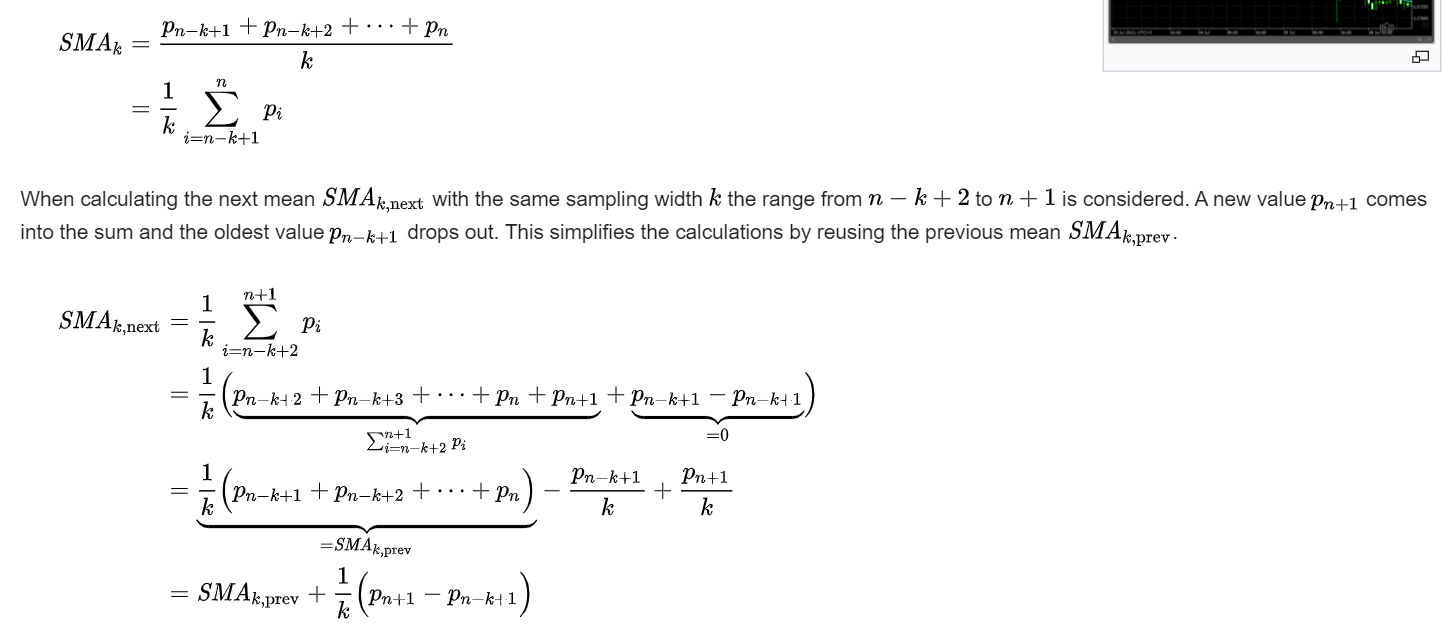

## 34. Using the original dataset, test the unit root hypothesis for all variables. 









In [55]:
# Worksheet name to extract
sheet_name = "A1. Headline series"

# Columns from which to extract the data
columns_to_extract = [0, 1, 16, 27]

# Load data from the Excel file into a DataFrame
df = pd.read_excel("threecenturies_v2.3.xlsx", sheet_name=sheet_name, header=None, skiprows=7)
df = df.iloc[:, columns_to_extract]
df.columns = ["Year", "Real GDP at market prices", "Unemployment rate", "Consumer price inflation"]
df = df[(df['Year'] >= 1900) & (df['Year'] <= 2000)]
df.head()

# Columns to test for unit root
columns_to_test = ["Real GDP at market prices", "Unemployment rate", "Consumer price inflation"]

# Function to perform the ADF test and display results
def adf_test(column_name):
    result = adfuller(df[column_name].dropna())
    print(f"ADF Test Results for '{column_name}':")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value}")
    if result[0] < result[4]['1%']:
        print("ADF Statistic < 1% Critical Value: Series is likely stationary")
    else:
        print("ADF Statistic > 1% Critical Value: Series is likely non-stationary")
    if result[0] < result[4]['5%']:
        print("ADF Statistic < 5% Critical Value: Series is likely stationary")
    else:
        print("ADF Statistic > 5% Critical Value: Series is likely non-stationary")
    if result[0] < result[4]['10%']:
        print("ADF Statistic < 10% Critical Value: Series is likely stationary")
    else:
        print("ADF Statistic > 10% Critical Value: Series is likely non-stationary")
    print("///////////////")
# Apply ADF test to each column
for column in columns_to_test:
    adf_test(column)

ADF Test Results for 'Real GDP at market prices':
ADF Statistic: 4.334307365243235
p-value: 1.0
Critical Values:
	1%: -3.4989097606014496
	5%: -2.891516256916761
	10%: -2.5827604414827157
ADF Statistic > 1% Critical Value: Series is likely non-stationary
ADF Statistic > 5% Critical Value: Series is likely non-stationary
ADF Statistic > 10% Critical Value: Series is likely non-stationary
///////////////
ADF Test Results for 'Unemployment rate':
ADF Statistic: -1.1055885815686552
p-value: 0.7128381053307462
Critical Values:
	1%: -3.497501033
	5%: -2.89090644
	10%: -2.5824349
ADF Statistic > 1% Critical Value: Series is likely non-stationary
ADF Statistic > 5% Critical Value: Series is likely non-stationary
ADF Statistic > 10% Critical Value: Series is likely non-stationary
///////////////
ADF Test Results for 'Consumer price inflation':
ADF Statistic: -1.579147094250374
p-value: 0.49405956588836103
Critical Values:
	1%: -3.503514579651927
	5%: -2.893507960466837
	10%: -2.583823615311909


## 35. Transform all variables so that they are stationary using either your answers to questions 32-33 or to question 34. 










In [56]:
# Worksheet name to extract
sheet_name = "A1. Headline series"

# Columns from which to extract the data
columns_to_extract = [0, 1, 16, 27]

# Load data from the Excel file into a DataFrame
df = pd.read_excel("threecenturies_v2.3.xlsx", sheet_name=sheet_name, header=None, skiprows=7)
df = df.iloc[:, columns_to_extract]
df.columns = ["Year", "Real GDP at market prices", "Unemployment rate", "Consumer price inflation"]
df = df[(df['Year'] >= 1900) & (df['Year'] <= 2000)]
df.head()

# List of columns to process
columns_to_process = ["Real GDP at market prices", "Unemployment rate", "Consumer price inflation"]

# Calculate the moving average and compute the differences for each column
window = 5
for column_name in columns_to_process:
    df[column_name + '_MA5'] = df[column_name].rolling(window=window).mean()
    df['Stationary_' + column_name] = df[column_name] - df[column_name + '_MA5']

# Calculate the moving average and compute the differences for each stationary column
window = 10
for column_name in columns_to_process:
    df['MA_10'+ column_name] = df['Stationary_' + column_name].rolling(window=window).mean()
    df['Difference'+column_name] = df['Stationary_' + column_name] - df['MA_10'+ column_name]

df.head()


,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation,Real GDP at market prices_MA5,Stationary_Real GDP at market prices,Unemployment rate_MA5,Stationary_Unemployment rate,Consumer price inflation_MA5,Stationary_Consumer price inflation,MA_10Real GDP at market prices,DifferenceReal GDP at market prices,MA_10Unemployment rate,DifferenceUnemployment rate,MA_10Consumer price inflation,DifferenceConsumer price inflation
240,1900,181160.264436,55.463046,1.130612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,1901,184974.529384,55.465670,1.127220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,1902,187756.550527,55.468294,1.127220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,1903,186015.768150,55.470918,1.139657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,1904,188155.559259,55.473542,1.135135,185612.534351,2543.024907,55.468294,0.005248,1.131969,0.003166,NaN,NaN,NaN,NaN,NaN,NaN


## 36. Explain the difference between ACF and PACF. 










ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) are both tools used in time series analysis to understand and identify the relationships between values in a sequence.

$\textbf{• ACF:} $ ACF measures the correlation between a time series and its lagged values. It calculates correlations at different lags, showing how each observation in a time series is correlated with its previous observations at different time lags. ACF helps in identifying the pattern of dependency between observations separated by different time intervals

$ \textbf{• PACF:} $ PACF, on the other hand, measures the correlation between a time series and its lagged values while controlling for the intermediate lags. It calculates the correlation between two observations while removing the effect of the correlations at the intermediate lags. PACF helps in identifying the direct relationship between observations without the influence of the intervening observations.









## 37. Plot and comment on the ACF and PACF of all variables. 
 










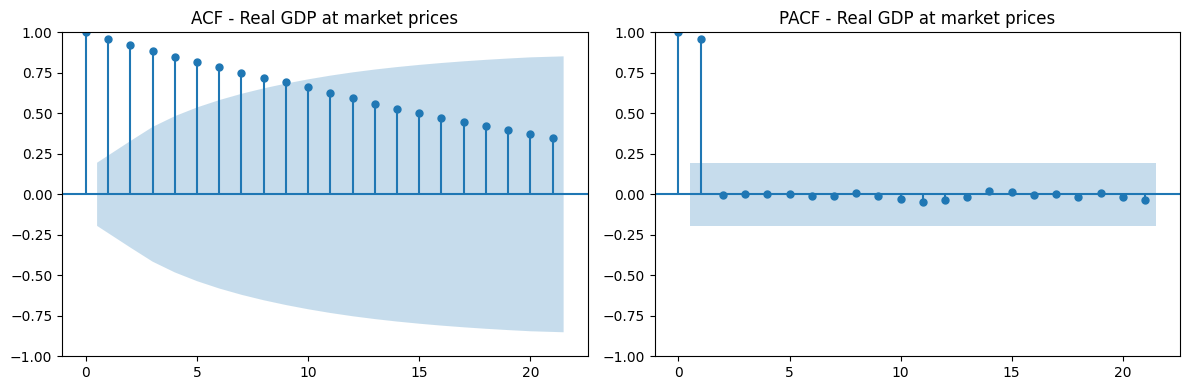

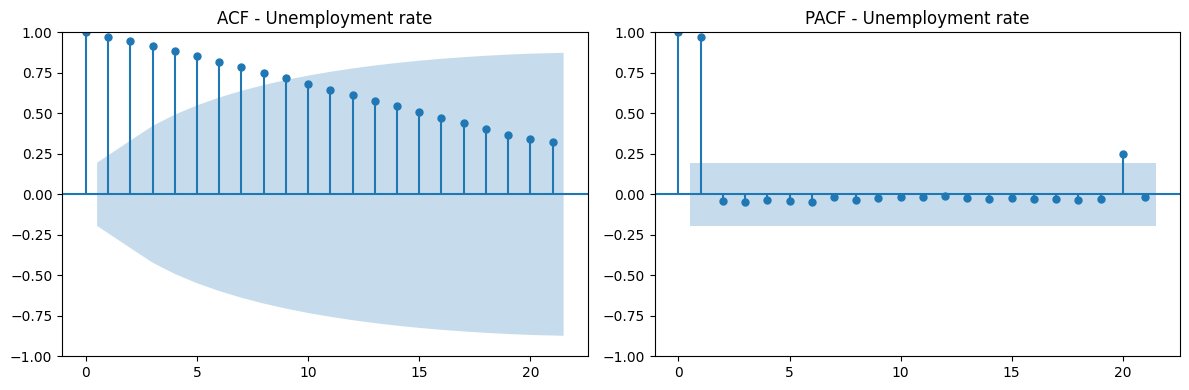

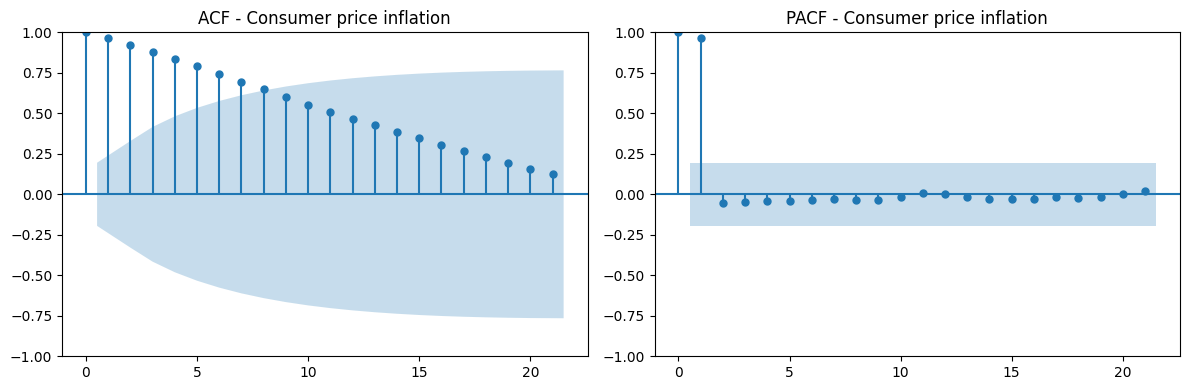

c:\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


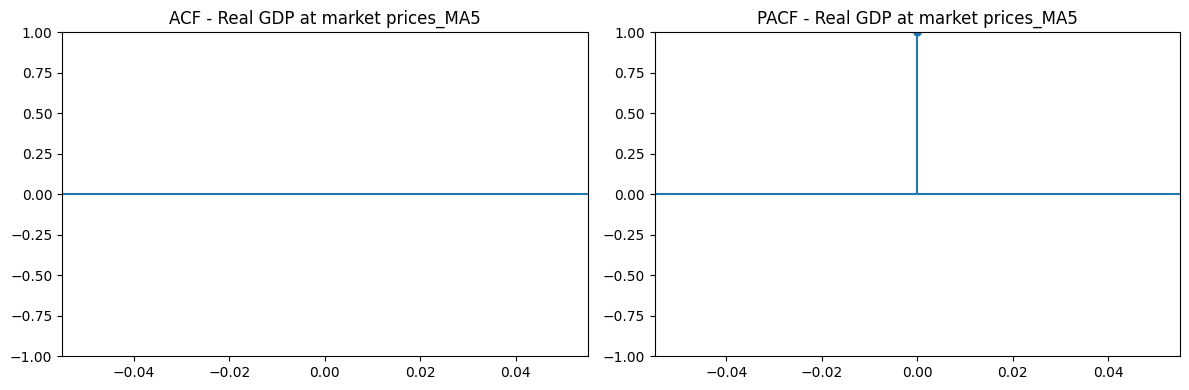

c:\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


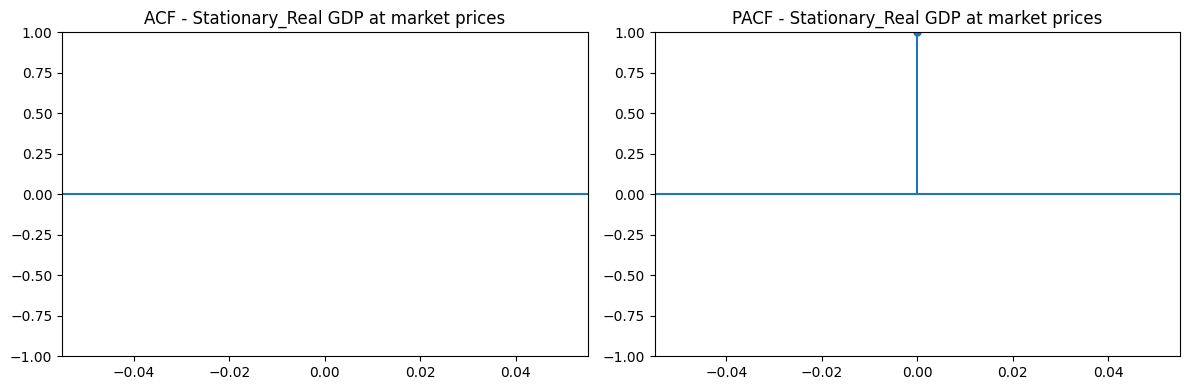

c:\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


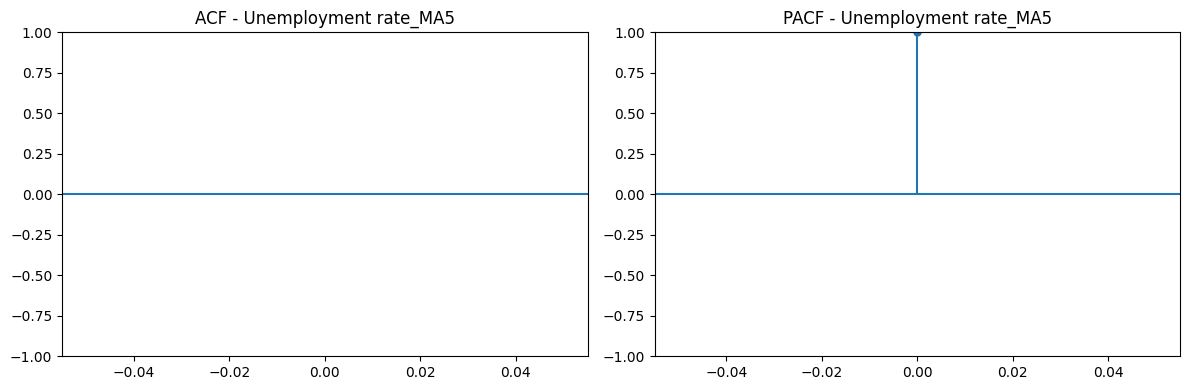

c:\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


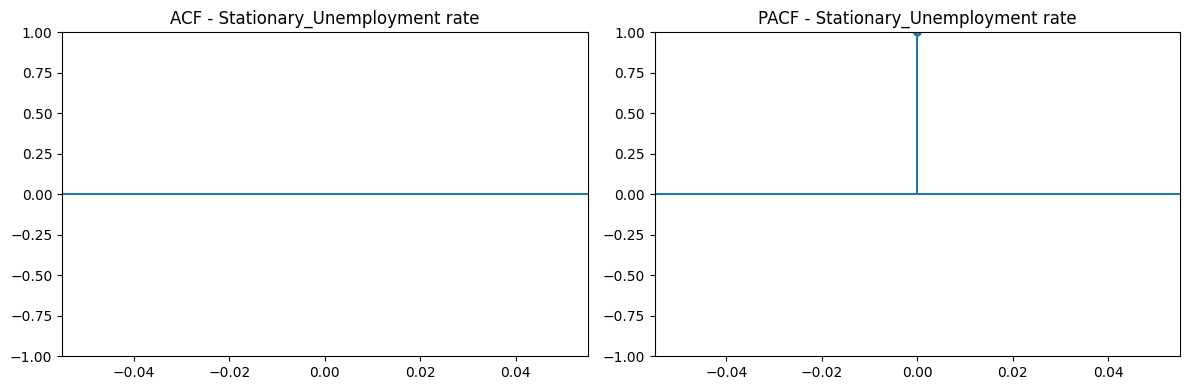

c:\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


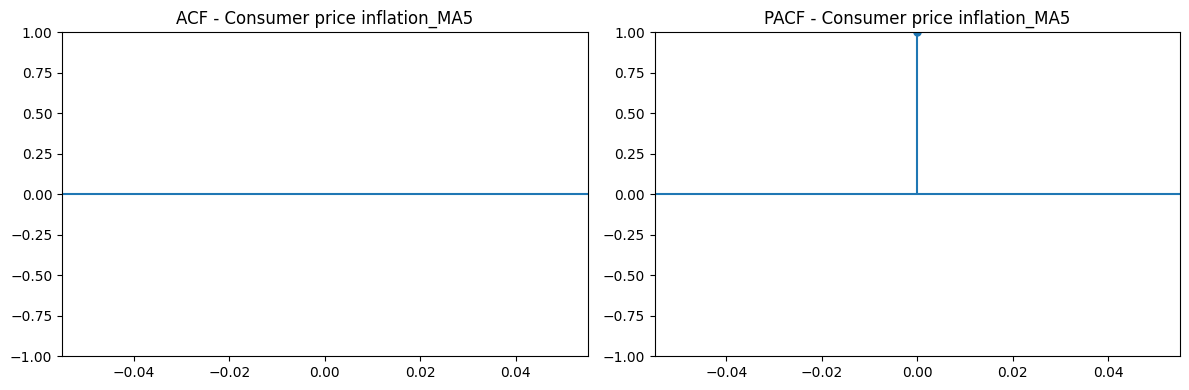

c:\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


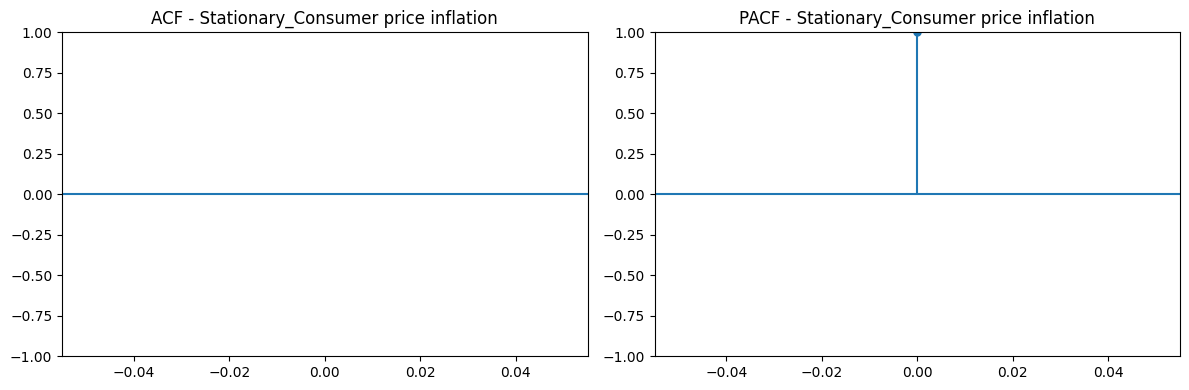

c:\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


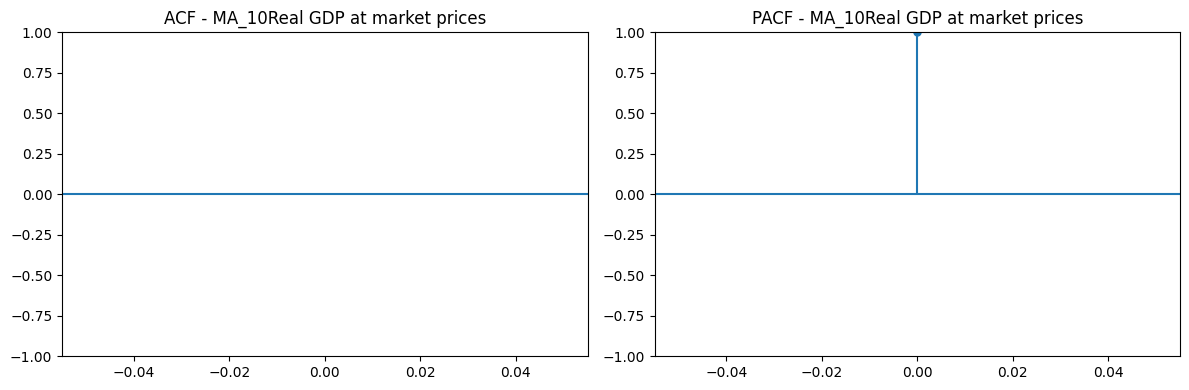

c:\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


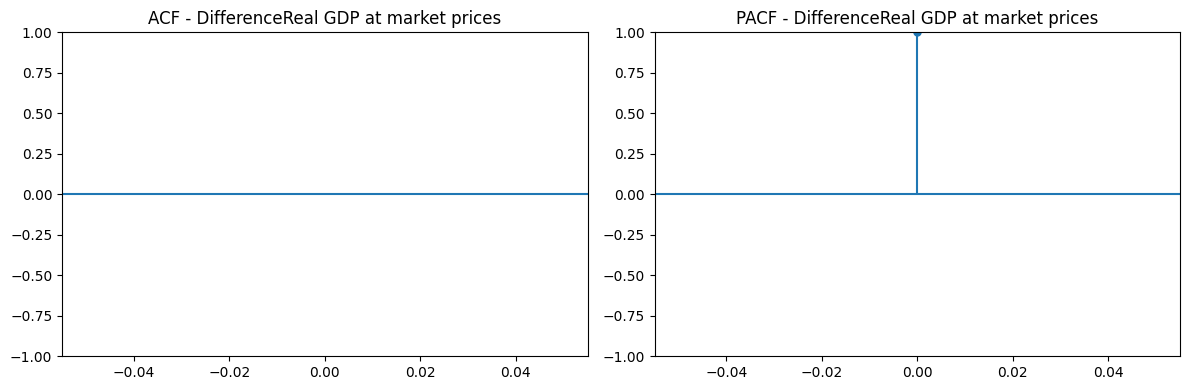

c:\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


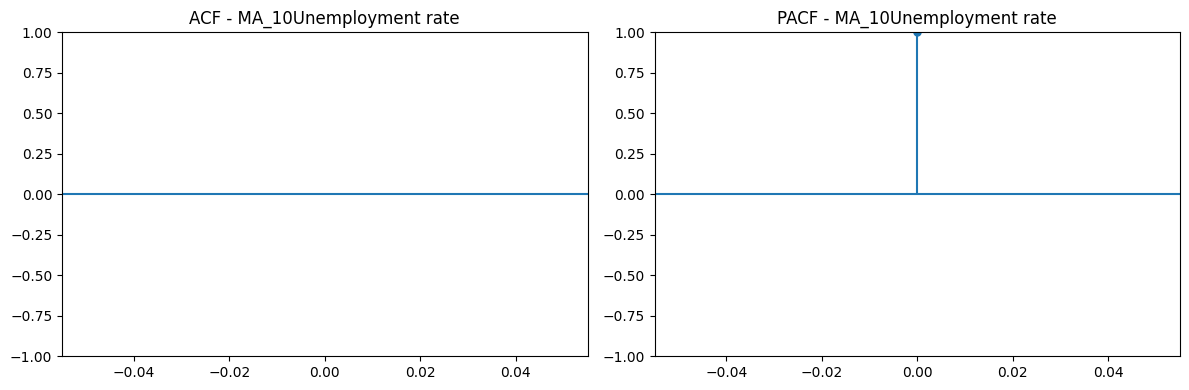

c:\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


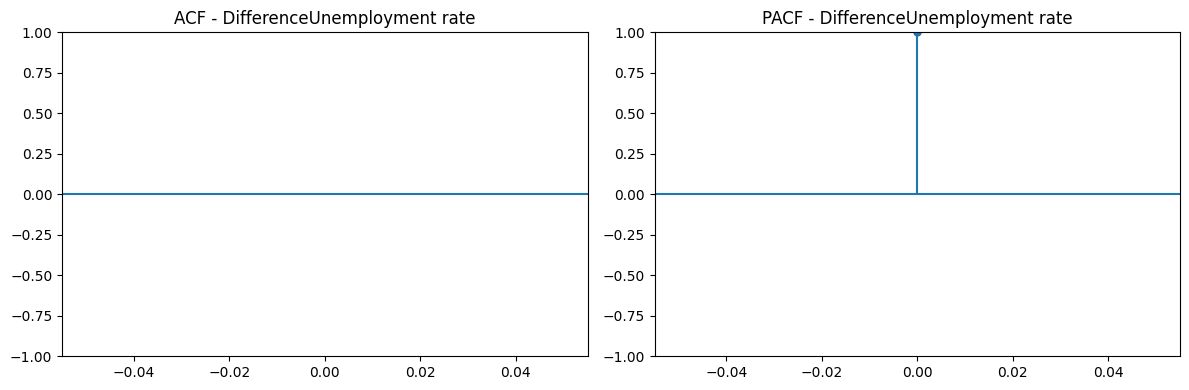

c:\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


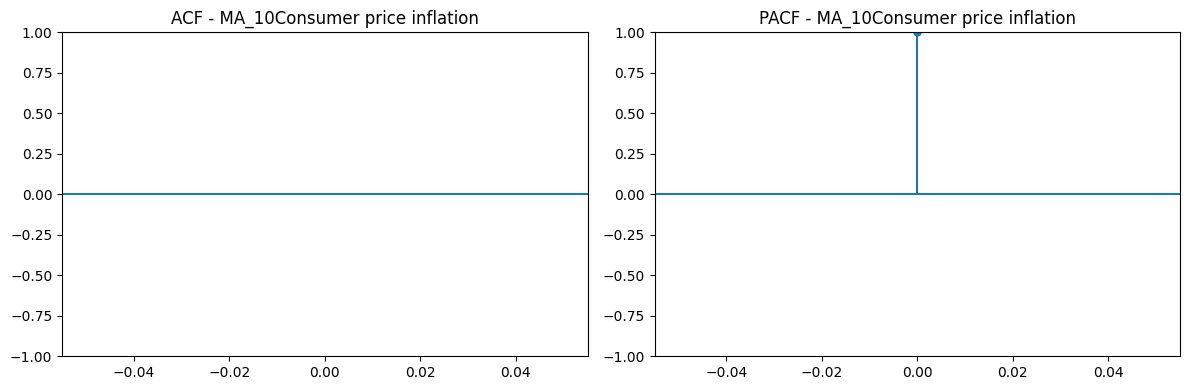

c:\Python311\Lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


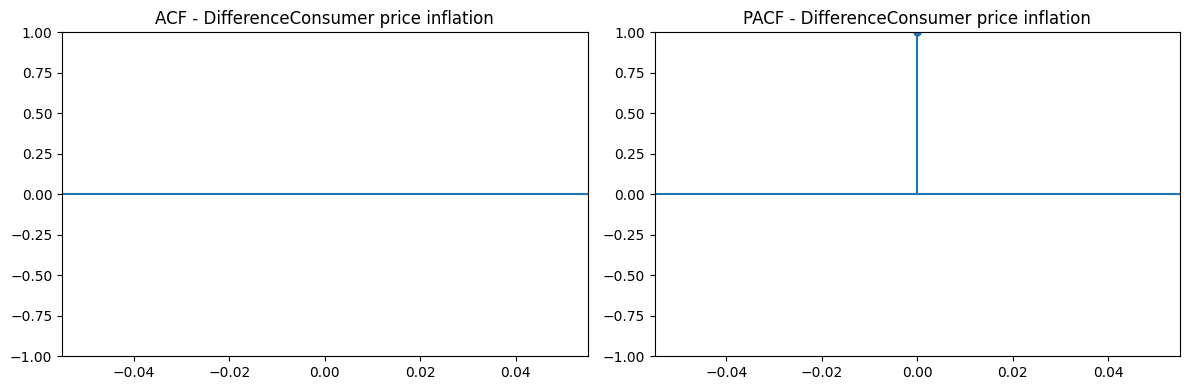

In [57]:
# Select columns for analysis excluding the 'Year' column
columns_to_plot = df.columns[1:]

for column in columns_to_plot:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    # ACF plot
    plot_acf(df[column], ax=ax[0], title=f'ACF - {column}')
    # PACF plot
    plot_pacf(df[column], ax=ax[1], title=f'PACF - {column}')
    plt.tight_layout()
    plt.show()


- **Real GDP at market prices:** We can observe that the more the lags increase, the more the autocorrelation decreases. However, it is always strictly positive, which means that the current values are always correlated with their past values, but as the times passes, the "impact" their previous values have is less important.
When it comes to the PACF, we can observe that the values seem to be only correlated to the precedent ones and barely by the others.

- **Unemployment rate:** As far as the the ACF is concerned, we also observe a decreasing trend but with positive autocorrelation (which implies that the values are also linked to their past ones). However, the PACF shows that not only it is correlated to the value right before, but a significant correlation also appears at the lag 20.

- **Consumer price inflation:** The two graphs are quite similar to the Real GDP at market prices ones. However, we can note that the decrease of the ACF is more drastic, which implies that the trend changes more quickly.

- Since all the other graphs are based on the stationnary variables, we no longer have the first previous values anymore, which makes it impossible to get the ACF and PACF plots. Indeed the NAN values aren't handled.







## 38. Explain the principle of parsimony and its relationship with Ockham’s razor using the theory of information criterion. 

 










The principle of parsimony, often associated with Occam's razor, emphasizes simplicity and favors explanations or models that strike a balance between accuracy and complexity. In statistical modeling, this principle is crucial, especially when considering different models to explain a phenomenon.

The theory of information criterion, like the Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC), quantifies the trade-off between the goodness of fit and the complexity of a model. These criteria provide a quantitative measure to select the best model among several competing models.

The principle of parsimony aligns with Occam's razor, stating that among competing hypotheses or models, the one with the fewest assumptions or variables tends to be preferable. In statistical terms, simpler models that explain the data adequately are favored over complex ones, as long as they provide similar explanatory power.

Information criteria, such as AIC or BIC, incorporate this principle by penalizing models for their complexity. They account for both the goodness of fit and the number of parameters used in a model. The goal is to select a model that minimizes information loss (or maximizes the amount of information explained by the model) while avoiding unnecessary complexity that might overfit the data.

In essence, the principle of parsimony in conjunction with information criteria guides model selection by encouraging simplicity, minimizing unnecessary complexity, and promoting the most straightforward explanation or model that adequately represents the data.










## 39. Explain the problem of auto-correlation of the errors. 

 










This poses challenges as it violates one of the key assumptions of regression analysis: the independence of residuals.
Autocorrelation affects the estimated coefficients' precision and bias, impacting the statistical significance of the regression coefficients.
Moreover, autocorrelation can lead to less precise parameter estimates, reducing the efficiency of the estimation process.
And finally, incorrectly assuming independence among residuals can lead to incorrect statistical inferences, such as underestimated standard errors and inflated test statistics.








## 40. Using only stationary variables, run a regression of GDP on constant, unemployment and inflation and test the hypothesis of no-autocorrelation of errors. 
 

 










In [185]:
df.head()

,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation,Real GDP at market prices_MA5,Stationary_Real GDP at market prices,Unemployment rate_MA5,Stationary_Unemployment rate,Consumer price inflation_MA5,Stationary_Consumer price inflation,MA_10Real GDP at market prices,DifferenceReal GDP at market prices,MA_10Unemployment rate,DifferenceUnemployment rate,MA_10Consumer price inflation,DifferenceConsumer price inflation
253,1913,223344.587287,55.497164,1.243674,210650.859732,12693.727555,55.491914,0.005250,1.210660,0.033014,6117.285956,6576.441599,0.005249,0.000001,0.019175,0.013839
254,1914,227790.457209,55.365828,1.275331,216332.289851,11458.167358,55.467747,-0.101919,1.231011,0.044320,7008.800201,4449.367158,-0.005468,-0.096451,0.023291,0.021029
255,1915,240295.539565,55.365828,1.434747,223464.754340,16830.785225,55.443054,-0.077226,1.278270,0.156477,8136.668110,8694.117115,-0.013715,-0.063511,0.038350,0.118126
256,1916,242999.513035,55.365828,1.694436,229787.700144,13211.812891,55.417837,-0.052009,1.376789,0.317647,8687.789376,4524.023515,-0.019441,-0.032568,0.069866,0.247781
257,1917,241402.923323,55.365828,2.121434,235166.604084,6236.319239,55.392095,-0.026267,1.553924,0.567510,8454.636647,-2218.317408,-0.022592,-0.003675,0.125148,0.442362


In [58]:
# Using only stationary variables, run a regression of GDP on constant, unemployment and inflation
# Drop NaN values from the DataFrame
df.dropna(inplace=True)

# Define the target variable y (dependent variable)
y = df['Stationary_Real GDP at market prices']

# Create the feature matrix X (independent variables) including a constant column
X = df[['Stationary_Unemployment rate', 'Stationary_Consumer price inflation']]
X = sm.add_constant(X)  

# Fit the linear regression model
model = sm.OLS(y, X)

# Fitting the model to the data
resultsu = model.fit()

In [59]:
#To test the autocorrelation of errors by examining the hypothesis H0: ρ = 0
#In the equation u(t) = ρu(t − 1) + ν
# We obtain the errors and construct the variable u(t − 1).

u=resultsu.resid
n=len(u)
u_1=u[0:n-1]
const=np.ones(n-1)
X=np.column_stack((const, u_1))
X=X[:,1]
y=u[1:n]
model=sm.OLS(y,X)
results1 = model.fit()
print(results1.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.638
Model:                            OLS   Adj. R-squared (uncentered):              0.633
Method:                 Least Squares   F-statistic:                              151.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                    1.18e-20
Time:                        21:15:52   Log-Likelihood:                         -953.67
No. Observations:                  87   AIC:                                      1909.
Df Residuals:                      86   BIC:                                      1912.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [60]:
# Perform the Durbin-Watson test
durbin_watson_statistic = durbin_watson(results1.resid)

# Print the test statistic
print(f"Durbin-Watson test statistic: {durbin_watson_statistic}")

# Interpret the test statistic 
#The Durbin-Watson test statistic ranges between 0 and 4. 
# A value around 2 suggests no autocorrelation, 
# while values closer to 0 indicate positive autocorrelation 
# and values near 4 indicate negative autocorrelation. 
# The threshold values of 1.5 and 2.5 are approximate critical values
# used as a guideline for assessing the presence of autocorrelation:

if durbin_watson_statistic < 1.5:
    print("Positive autocorrelation may be present.")
elif durbin_watson_statistic > 2.5:
    print("Negative autocorrelation may be present.")
else:
    print("No significant autocorrelation detected.")

Durbin-Watson test statistic: 1.280841126266438
Positive autocorrelation may be present.


## 41. Regardless of your answer to question 40, correct auto-correlation with GLS. Comment on the difference with question 40. 

 










In [61]:
# Using only stationary variables, run a regression of GDP on constant, unemployment and inflation
# Drop NaN values from the DataFrame
df.dropna(inplace=True)

# Define the target variable y (dependent variable)
y = df['Stationary_Real GDP at market prices']

# Create the feature matrix X (independent variables) including a constant column
X = df[['Stationary_Unemployment rate', 'Stationary_Consumer price inflation']]
X = sm.add_constant(X)  

# Fit the linear regression model
model = sm.OLS(y, X)

# Fitting the model to the data
resultsu = model.fit()

# Autocorrelation correction, In the course we have Considered the simple model
# y_t-1 = β_0 + β_1 x_t-1 + u_t-1
# y_t = β_0 + β_1 x_t + u_t
# and did the Difference between the two equations
# y_t - y_t-1 = β_0 + β_1 (x_t - x_t-1) + u_t - u_t-1
# So the Regression without autocorrelation is :
# ŷ_t = β_0 + β_1 (x_t - x_t-1) + e_t

# Create the differences of the variables
df_diff = df.diff().dropna()  

# Define the target variable y (dependent variable)
y_diff = df_diff['Stationary_Real GDP at market prices']

# Create the feature matrix X (independent variables) including a constant column
X_diff = df_diff[['Stationary_Unemployment rate', 'Stationary_Consumer price inflation']]
X_diff = sm.add_constant(X_diff)

# Fit the linear regression model with differences
model_diff = sm.OLS(y_diff, X_diff)

# Fitting the model to the differenced data
results_diff = model_diff.fit()
print(results_diff.summary())


                                     OLS Regression Results                                     
Dep. Variable:     Stationary_Real GDP at market prices   R-squared:                       0.423
Model:                                              OLS   Adj. R-squared:                  0.409
Method:                                   Least Squares   F-statistic:                     30.75
Date:                                  Mon, 11 Dec 2023   Prob (F-statistic):           9.55e-11
Time:                                          21:16:00   Log-Likelihood:                -928.09
No. Observations:                                    87   AIC:                             1862.
Df Residuals:                                        84   BIC:                             1870.
Df Model:                                             2                                         
Covariance Type:                              nonrobust                                         
                              

## 42. For all variables, construct their lag 1 and lag 2 variables.

 










In [62]:
# Worksheet name to extract
sheet_name = "A1. Headline series"

# Columns from which to extract the data
columns_to_extract = [0, 1, 16, 27]

# Load data from the Excel file into a DataFrame
df = pd.read_excel("threecenturies_v2.3.xlsx", sheet_name=sheet_name, header=None, skiprows=7)
df = df.iloc[:, columns_to_extract]
df.columns = ["Year", "Real GDP at market prices", "Unemployment rate", "Consumer price inflation"]
df = df[(df['Year'] >= 1900) & (df['Year'] <= 2000)]

# Lag values to be constructed
lags = [1, 2]  

# Loop through each column in the DataFrame
for column in df.columns:
    for lag in lags:
        # Create lagged variables
        df[f"{column}_lag{lag}"] = df[column].shift(lag)
        
df.head()



,Year,Real GDP at market prices,Unemployment rate,Consumer price inflation,Year_lag1,Year_lag2,Real GDP at market prices_lag1,Real GDP at market prices_lag2,Unemployment rate_lag1,Unemployment rate_lag2,Consumer price inflation_lag1,Consumer price inflation_lag2
240,1900,181160.264436,55.463046,1.130612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,1901,184974.529384,55.465670,1.127220,1900.0,NaN,181160.264436,NaN,55.463046,NaN,1.130612,NaN
242,1902,187756.550527,55.468294,1.127220,1901.0,1900.0,184974.529384,181160.264436,55.465670,55.463046,1.127220,1.130612
243,1903,186015.768150,55.470918,1.139657,1902.0,1901.0,187756.550527,184974.529384,55.468294,55.465670,1.127220,1.127220
244,1904,188155.559259,55.473542,1.135135,1903.0,1902.0,186015.768150,187756.550527,55.470918,55.468294,1.139657,1.127220


## 43. Run a regression of GDP on constant, lag 1 unemployment, lag 2 unemployment, lag 1 inflation, lag 2 inflation. What is the number of observations and why? 











In [63]:
# Drop rows with missing values
df.dropna(inplace=True)

# Define the target variable
y = df['Real GDP at market prices']

# Create the feature matrix X (independent variables) including a constant column
X = df[['Unemployment rate_lag1', 'Unemployment rate_lag2', 'Consumer price inflation_lag1', 'Consumer price inflation_lag2']]
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the number of observations
num_observations = model.nobs
print(f"Number of observations: {num_observations}")

# Get the summary of the regression results
print(model.summary())


Number of observations: 99.0
                                OLS Regression Results                               
Dep. Variable:     Real GDP at market prices   R-squared:                       0.960
Model:                                   OLS   Adj. R-squared:                  0.958
Method:                        Least Squares   F-statistic:                     561.1
Date:                       Mon, 11 Dec 2023   Prob (F-statistic):           1.15e-64
Time:                               21:16:07   Log-Likelihood:                -1244.3
No. Observations:                         99   AIC:                             2499.
Df Residuals:                             94   BIC:                             2512.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------

The two lagged columns introduce NAN values, especially the lag 2 which ppresents two NAN values. Since we got rid of the rows having NAN values, there are two less observations than initially. Hence the 99 observations ( at first they were 101 of them).









## 44. State and test the no-Granger causality hypothesis of inflation on GDP at the 10% level 




The Granger causality test is a statistical hypothesis test for determining whether one time series can forecast another. The null hypothesis is that past values of one variable do not have any predictive power for another variable.

For testing the no-Granger causality hypothesis of inflation on GDP at the 10% level, we're essentially testing whether lagged inflation values have any significant predictive power for GDP. This is a Fisher hypothesis test.







In [64]:
# Worksheet name to extract
sheet_name = "A1. Headline series"

# Columns from which to extract the data
columns_to_extract = [0, 1, 16, 27]

# Load data from the Excel file into a DataFrame
df = pd.read_excel("threecenturies_v2.3.xlsx", sheet_name=sheet_name, header=None, skiprows=7)
df = df.iloc[:, columns_to_extract]
df.columns = ["Year", "Real GDP at market prices", "Unemployment rate", "Consumer price inflation"]
df = df[(df['Year'] >= 1900) & (df['Year'] <= 2000)]

# Define max lag
max_lag = 3

# Extract columns for the Granger test
data = df[['Real GDP at market prices', 'Consumer price inflation']].dropna()

# Run the Granger causality test
granger_test_result = grangercausalitytests(data, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0253  , p=0.8740  , df_denom=97, df_num=1
ssr based chi2 test:   chi2=0.0261  , p=0.8717  , df=1
likelihood ratio test: chi2=0.0261  , p=0.8718  , df=1
parameter F test:         F=0.0253  , p=0.8740  , df_denom=97, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9916  , p=0.0550  , df_denom=94, df_num=2
ssr based chi2 test:   chi2=6.3014  , p=0.0428  , df=2
likelihood ratio test: chi2=6.1090  , p=0.0471  , df=2
parameter F test:         F=2.9916  , p=0.0550  , df_denom=94, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.8617  , p=0.0035  , df_denom=91, df_num=3
ssr based chi2 test:   chi2=15.7071 , p=0.0013  , df=3
likelihood ratio test: chi2=14.5685 , p=0.0022  , df=3
parameter F test:         F=4.8617  , p=0.0035  , df_denom=91, df_num=3


c:\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


Granger Causality
number of lags (no zero) 1
F=0.0253, p=0.8740
Therefore, we do not reject H0.

Granger Causality
number of lags (no zero) 2
F=2.9916, p=0.0550
We reject H0.

Granger Causality
number of lags (no zero) 3
F=4.8617, p=0.0035
We reject H0.




## 45. Divide the sample in two groups: 1900-1950 and 1951-2000. Test the stability of coefficients between the two periods. 






In [65]:
from scipy.stats import ttest_ind
# Worksheet name to extract
sheet_name = "A1. Headline series"

# Columns from which to extract the data
columns_to_extract = [0, 1, 16, 27]

# Load data from the Excel file into a DataFrame
df = pd.read_excel("threecenturies_v2.3.xlsx", sheet_name=sheet_name, header=None, skiprows=7)
df = df.iloc[:, columns_to_extract]
df.columns = ["Year", "Real GDP at market prices", "Unemployment rate", "Consumer price inflation"]
df = df[(df['Year'] >= 1900) & (df['Year'] <= 2000)]
# Divide the sample into two periods
period_1 = df[(df['Year'] >= 1900) & (df['Year'] <= 1950)]
period_2 = df[(df['Year'] >= 1951) & (df['Year'] <= 2000)]

# Define variables for regression
y = 'Real GDP at market prices'
x = ['Unemployment rate', 'Consumer price inflation']  # Your independent variables here

# Run separate regressions for each period
model_1 = sm.OLS(period_1[y], sm.add_constant(period_1[x])).fit()
model_2 = sm.OLS(period_2[y], sm.add_constant(period_2[x])).fit()

# Compare coefficients
coeff_diff = model_2.params - model_1.params  # Difference in coefficients
print("Difference in coefficients between the two periods:")
print(abs(coeff_diff))


Difference in coefficients between the two periods:
const                       1.536647e+06
Unemployment rate           3.195985e+04
Consumer price inflation    3.376939e+04
dtype: float64


We obtained differences that are important for the three parameters, which suggest that the stability between the two periods isn't robust at all. In other words, the impact of the independent variables on the Real GDP at market prices is not consistent over time.






## 46. Test the structural breakpoint using a trim ratio of 25% at the 10% level 






In [66]:
from scipy.stats import f
from statsmodels.regression import linear_model

# Splitting the data into two periods based on the trim ratio (25%)
split_index = int(0.25 * len(df))

# Data for the first and second periods
first_period = df.iloc[:split_index]
second_period = df.iloc[split_index:]

# Fit linear regression models for each period
model_1 = linear_model.OLS(first_period['Real GDP at market prices'], first_period[['Unemployment rate', 'Consumer price inflation']]).fit()
model_2 = linear_model.OLS(second_period['Real GDP at market prices'], second_period[['Unemployment rate', 'Consumer price inflation']]).fit()

# Calculate the residuals for each period
residuals_1 = model_1.resid
residuals_2 = model_2.resid

# Compute the Chow test statistic
num_obs = len(df)
num_params = model_1.df_model + model_2.df_model
rss_total = sum(model_1.resid**2) + sum(model_2.resid**2)
rss_1 = sum(residuals_1**2)
rss_2 = sum(residuals_2**2)
chow_statistic = ((rss_total - (rss_1 + rss_2)) / num_params) / ((rss_1 + rss_2) / (num_obs - 2 * num_params))

# Degrees of freedom
df1 = num_params
df2 = num_obs - 2 * num_params

# Calculate the critical value for the Chow test at a 10% significance level
critical_value = f.ppf(0.9, df1, df2)

# Compare the Chow statistic with the critical value
if chow_statistic > critical_value:
    print("Reject null hypothesis: Structural breakpoint detected at the 10% level.")
else:
    print("No evidence of a structural breakpoint at the 10% level.")
    


No evidence of a structural breakpoint at the 10% level.


At first, this result seems contradictory with the results we found for question 45 since the test inidcates that there is no structural breakpoint between the two subsets. However, an explanation as to why the test didn't detect it while the question 45 suggests that their is one could be that the two subsets used aren't the same. Indeed in question 46 we split the datasets into two equal datasets while for question 46 it was a 25-75 split. On top of that, unequal sample sizes might reduce the ability to detect structural breaks, especially if the changes in coefficients are subtle or if the period with fewer observations has a higher variability.








$\textbf{ ------------------------------------------------------------THE END-----------------------------------------------------------------------------}$
